# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly

### Part 1 
removing all inconsistencies and missing values

In [1]:
!pip install --upgrade numpy

     |████████████████████████████████| 17.3 MB 16 kB/s  eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Z Score
from scipy import stats
# Robust Scaler
from sklearn.preprocessing import RobustScaler

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/manish0222/TE_SEM_6/main/ds_lab/ASGN2/Asgn2_uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [40]:
df.isna().sum() ## count of null values per column

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [41]:
df.ffill()
df.bfill()
df.isna().sum() # using forward fill and backward fill method

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [42]:
# To remove the null values we use this
df.interpolate(inplace=True)
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [43]:
df.head(8)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1


In [44]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [45]:
#rename a column
df.rename(columns={'Unnamed: 0':'Index'},inplace = True)  #note syntax :
df

,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


### Part 2 OUTLINERS
OUTLINERS CHECK AND TECHNIQUES TO DEAL WITH THEM

0) Outliners are those data points that are distant from all other observations and lie outside all other distribution
1) First way to do is Z-score (x-U/σ) method, 
    there u is the central value,
    all values that lie after 3rd deviation are considered as outliners

2) IQR - inter quartile range 
    all values after 1.5 times of interquartile range ie above 3rd and below 1 

3) box plot

4) Using scatter points

### 1-Z-score detection
z=(dataPoint - mean /std-deviation)

In [46]:
z = np.abs(stats.zscore(df['passenger_count']))
z

0         0.493895
1         0.493895
2         0.493895
3         0.949114
4         2.392122
            ...   
199995    0.493895
199996    0.493895
199997    0.227609
199998    0.493895
199999    0.493895
Name: passenger_count, Length: 200000, dtype: float64

In [47]:
#Outliner detection  
arr = np.where(z>3)  
# arr has only the indices where it has z>3 in a list form
print(arr)  
print("total outliners in it ",len(arr[0]))

#remove outliners by below command
# df_no_outliers = df[(z <= 3)] for a new column
# df=df[z<=3]  changes in same column
df

(array([   145,    252,    390, ..., 199890, 199893, 199957]),)
total outliners in it  4272


,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


### IQR inter quartile range 
Sure, let me explain how the concepts of Q1 (the first quartile), Q3 (the third quartile), and the Interquartile Range (IQR) work:

Quartiles (Q1, Q3):

1) Q1 (First Quartile): It is the median of the lower half of the dataset. It represents the value below which 25% of the data falls.
2) Q3 (Third Quartile): It is the median of the upper half of the dataset. It represents the value below which 75% of the data falls.
#### Interquartile Range (IQR):

1) The IQR is a measure of statistical dispersion, or in simple terms, it's the range in which the middle 50% of the data values lie.
2) Mathematically, IQR is calculated as the difference between Q3 and Q1: IQR = Q3 - Q1.
3) The IQR is used in detecting outliers. According to the IQR rule, values outside the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR are considered potential outliers.

In [48]:
# IQR 
# Calculate the first quartile (Q1) and third quartile (Q3) for 'fare_amount'
Q1 = df['fare_amount'].quantile(0.25)
Q3 = np.percentile(df['fare_amount'], 75, interpolation='midpoint')

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the results
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 6.0
Q3: 12.5
IQR: 6.5


/tmp/ipykernel_2761/2817034194.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['fare_amount'], 75, interpolation='midpoint')


In [49]:
# Above Upper bound
upper = df['fare_amount'] >= (Q3+1.5*IQR)
 
print("Upper bound:",Q3+1.5*IQR)
print(np.where(upper))
 
# Below Lower bound
lower = df['fare_amount'] <= (Q1-1.5*IQR)
print("Lower bound:", Q1-1.5*IQR)
print(np.where(lower))
# These are the outliers combining Upper Bounded Array and Lowe Bounded Array



Upper bound: 22.25
(array([     6,     30,     34, ..., 199982, 199985, 199997]),)
Lower bound: -3.75
(array([ 63395,  89322,  92063,  98875, 104080, 111589, 139272, 148803,
       151681, 164056, 190925]),)


In [50]:
# print("Original shape",df.shape)
# # Above Upper bound
# upper_bound = Q3 + 1.5 * IQR
# upper_outliers = df['fare_amount'] >= upper_bound

# # Below Lower bound
# lower_bound = Q1 - 1.5 * IQR
# lower_outliers = df['fare_amount'] <= lower_bound

# # Combining Upper and Lower outliers
# all_outliers = upper_outliers | lower_outliers

# # Removing outliers
# df_no_outliers = df[~all_outliers]

# print("Done")
# df_no_outliers.shape

<Axes: xlabel='Index', ylabel='fare_amount'>

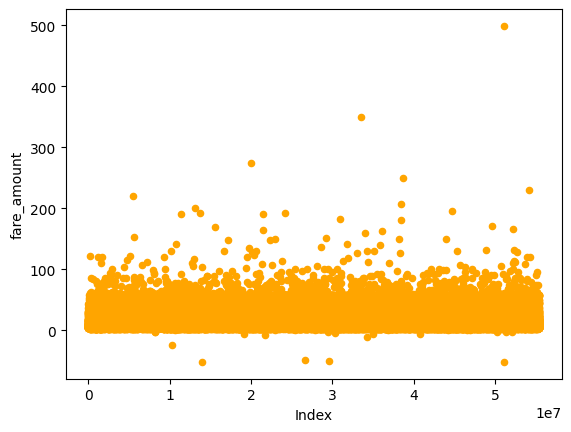

In [51]:
# Scatter plot
df.plot(kind='scatter', x='Index', y='fare_amount', alpha=1, color='orange')

In [52]:
# Remove outliers using IQR
df = df[(df['fare_amount'] < (Q3+1.5*IQR)) & (df['fare_amount'] > (Q1-1.5*IQR))]
df

,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


<Axes: ylabel='Frequency'>

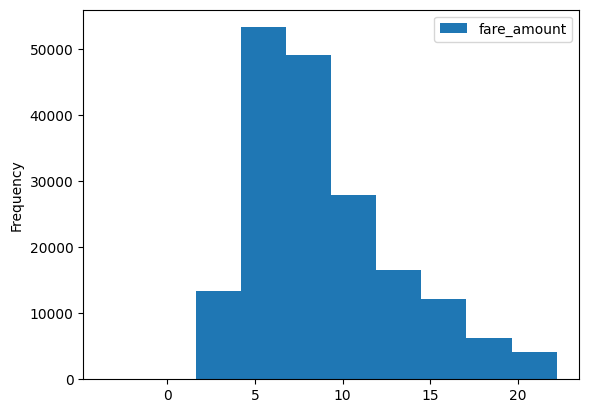

In [53]:
# skewData = df.skew(axis = 1)
# df['skewData'] = skewData
df.plot(kind='hist', y='fare_amount')

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'pickup_longitude'}>],
       [<Axes: title={'center': 'pickup_latitude'}>,
        <Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>],
       [<Axes: title={'center': 'passenger_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

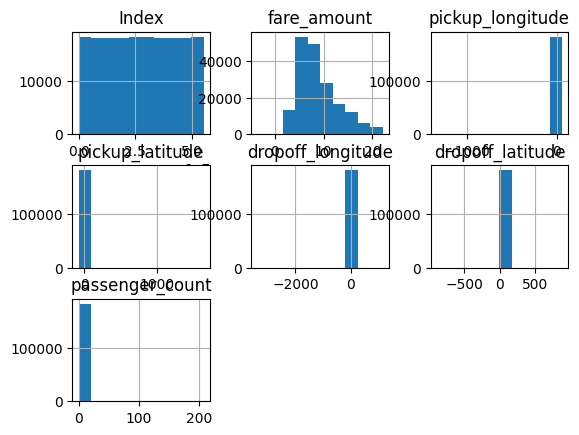

In [54]:
df.hist() # This function will plot historgram for each column
     

<Axes: ylabel='Frequency'>

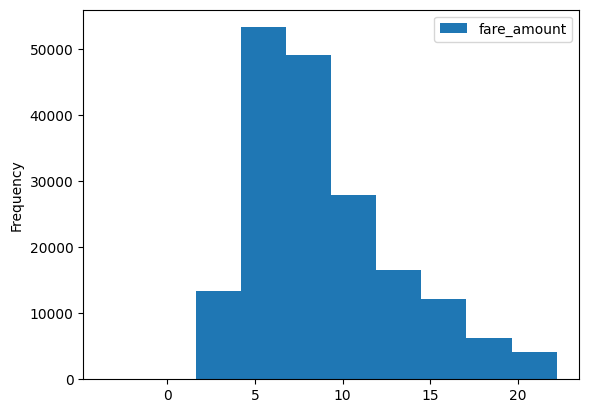

In [55]:
# As we have only considered one column, fare_amount and removed its outliers, we will use it
df.plot(kind='hist', y='fare_amount')

In [56]:
df.skew() #return skew of each col

/tmp/ipykernel_2761/2657543212.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew() #return skew of each col


Index                -0.001498
fare_amount           0.996642
pickup_longitude     -7.860466
pickup_latitude      67.360020
dropoff_longitude   -75.521832
dropoff_latitude     -7.952965
passenger_count      19.448709
dtype: float64

/home/student/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2761/2585697986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_amount'] = np.sqrt(df['fare_amount'])


<Axes: ylabel='Frequency'>

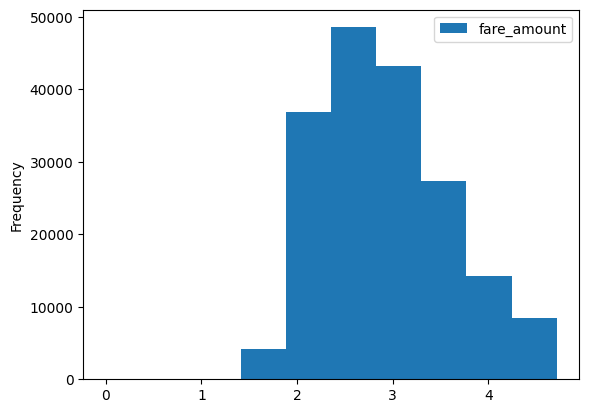

In [57]:
#df['fare_amount'] = np.log(df['fare_amount'])
# Here log wont work as data contains negetive values so use squareroot
df['fare_amount'] = np.sqrt(df['fare_amount'])
df.plot(kind='hist',y='fare_amount')

In [58]:
df.skew()

/tmp/ipykernel_2761/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Index                -0.001498
fare_amount           0.550725
pickup_longitude     -7.860466
pickup_latitude      67.360020
dropoff_longitude   -75.521832
dropoff_latitude     -7.952965
passenger_count      19.448709
dtype: float64